### Clayton Brittan - Deep Learning Tiny Image Classifier - 4/8/2024

DataSet: https://www.cs.toronto.edu/~kriz/cifar.html

Reference: Learning Multiple Layers of Features from Tiny Images, Alex Krizhevsky, 2009.

## Topic

My project is a Deep Learning Image Classification Model, that aims to classify 32x32 images into 10 different subclasses. The dataset I am using is called Cifar10 and is a subset of the 80 Million tiny images dataset. This project aims to be able to take in an arbitrary 32x32 image and classify it accordingly. This model attempt to solve a image classification problem using Keras, a tensor flow library adept at creating visual classification models.

This project is important because it allows anyone to identify the subject matter of very small photos accurately. A 32x32 is very small and because of it's limited information it may be hard to discern what the photo actually is, this model will be able to accurately predict what the photo is of. As well this model is able to take in new 32x32 photos and classify them accordingly. This project is important to me as I want to further my understanding of deep learning and this project served as a great introduction to image classification. With this model as a baseline you can incorporate even more classes and larger image sizes so that the model could classify any arbitrary image the user inputs.

My motivation behind this project was to be able to build a deep learning model for classification, these types of models are incredibly useful in many different aspects of society. One example is for security or criminal identification, if you can train the program on individuals faces it could identify criminals from cctv footage. That is just one example of the capabilities of Deep learning classification models, they have incredible potential which drove me to creating this project

__Libraries__

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
from PIL import Image
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.datasets import cifar10
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

## Data Cleaning and EDA

Our primary concerns with Data Cleaning and EDA for our model is to make sure the data is in the correct form to be passed into the neural network. Luckily this dataset is part of the tensorflow/keras datasets library, so we can use this to automatically import and split our data along the predefined batches laid out by the dataset author. This saves us time and formatting for our image data as it already is in proper formatting. So our first step is to split the data into testing and training sets respectively

The image data is formatted as a 32x32 array where each entry in the array represents an RGB value in the form of a tuple (R, G, B). These values are by default between 0 and 255 so we need to normalize them to get them between 0-1. This is because we are using min-max activation functions, and these function operate optimally with normalized data. If we were to leave our data in the ranges of 0-255, the model may be less capable of understanding complex patterns in the data.

Now that we have loaded and normalized our data we can inspect our label values, and what you will see is that each image has a label in the form of a single element list, with its value being between 0-10 where each integer represent a different class. We need 10 neurons for our output layer, one representing each class, where our output is a probability distribution of each possible class. Since our output is a probability distribution of length 10, we cannot simply pass in and integer value as our labels. Therefor we need to One-Hot Encode our labels to be of the same form as our output layer. This means we will translate each label value into an array of size 10 where:

    Array = { 1 if label;  0 if else }

Next we can check our data for missing values quickly with a boolean search, since there are no Null values we can continue.

Next we can print out the shape of the data, and what we expect it to look like

Then we can print out some examples of the data to get a better understanding of what the model is seeing.


__Load and Split Data__

In this step we load the data in using the keras.datasets library, this automatically formats our data into the training and testing set which saves alot of work.

We then One Hot Encode our label data so that it is in the correct form for our output layer of our neural network. If we leave it as an integer, our target and output variables would be mismatched. This way we can still retain the class information however now its reflecting the the index rather than the value.

As well we initialize our number of classes to use in our output layer

We also normalize the data values as they are intially in the form of RGB values which fall in the range (0,255) by diving them by their range we obtain values between 0-1. This allows our model to be more reliable.

In [2]:
# Initialize data and split it using tensorflow datasets
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

num_classes = len(np.unique(y_train))
print(num_classes)


# One Hot encoding label data 
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


# Normalize the RGB values from 0-255 to 0-1
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

print(y_train[0])


10
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


__Check for Null values__


In [3]:
# Boolean conditional check for Null values
Do_We_Have_Null_Values = None in X_train and None in X_test and None in y_train and None in y_test
if Do_We_Have_Null_Values == False:
    print("There are no Null Values in any dataset (X_train, X_test, y_train, y_test)")
else:
    print("Yall got so many Null values, lol couldn't be me.")

There are no Null Values in any dataset (X_train, X_test, y_train, y_test)


__Inspect Shape of Data and Plot Examples__

Each entry of the data is of size 32 by 32 where each entry contains 3 values 

Each entry represents an image of 1024 pixels that can be classified into 10 different classes

 Here are some examples of the images in the dataset


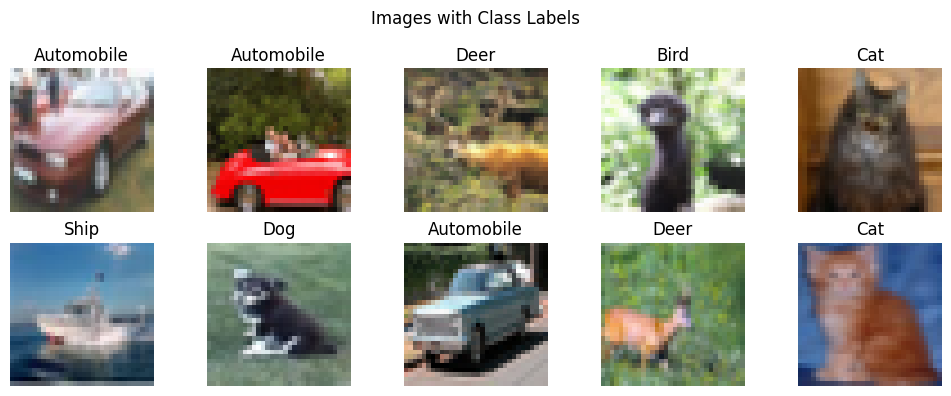

In [4]:
import random
# Print the shape and format of data
data_shape = X_test[0].shape

print(f"Each entry of the data is of size {data_shape[0]} by {data_shape[1]} where each entry contains {data_shape[2]} values \n")

print(f"Each entry represents an image of {data_shape[0]**2} pixels that can be classified into {num_classes} different classes")

print(f"\n Here are some examples of the images in the dataset")


# Initialize class names
class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

# Initialize figure to 2 rows of 5 axes
fig, axes = plt.subplots(2, 5, figsize=(10, 4))
# Initialize random indexes for phot selection
randList = random.sample(range(100), 10)

# Initialize loop to plot image and label
for i in range(10):
    image = X_train[randList[i]] 
    
    row = i // 5  
    col = i % 5  

    axes[row, col].imshow(image)

    class_index = np.argmax(y_train[randList[i]])

    axes[row, col].set_title(class_names[class_index])
    axes[row, col].axis('off')
# Give figure title
fig.suptitle('Images with Class Labels', fontsize=12)
plt.tight_layout()
plt.show()

## Model Building / Model Choice

For our image classification we are using a Convolutional Nueral Network, this model was chosen as it allows for multiple convolution layers and complete hands on training and optimizing experience. There are other models used for image classification such as VGG16 however these models are pre-trained so you simply optimize it for your specific data needs, but it does not allow for as much creativity and freedom as creating your own CNN. I compare different CNN models based on the amount and type of layers as well as optimization techniques. 

__Model Building__

Our first model is initialized with the input size, then we introduce a convolution layer to learn new features, we intialize it with a small number as it is our first layer, we choose 16. Then we reduce the dimensionality with a Pooling layer, Then we flatten the layers into a one dimensional vector which we then hit it with a Dense layer, initialized with a low value to reduce overfilling, and then we reach our output layer which uses softmax to produce our probability distribution for the label.

In [5]:
# Initialize model
model = Sequential([
  layers.Input((32, 32, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(16, activation='relu'),
  layers.Dense(10, activation='softmax')
])

In [6]:
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 16)     │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 16)             │        65,552 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           170 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 66,170 (258.48 KB)

 Trainable params: 66,170 (258.48 KB)

 Non-trainable params: 0 (0.00 B)

## Model Training 

Next we fit the model on the training data, and itilialize it with 30 epochs, after the 30th epoch the model is fitted and we have an accuracy of accuracy: 0.7175 - loss: 0.7899

In [7]:
# Fit the model
epochs=30
history = model.fit(
  X_train,
  y_train,
  validation_data= (X_test, y_test),
  epochs=epochs
)

Epoch 1/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.2281 - loss: 2.0452 - val_accuracy: 0.3250 - val_loss: 1.7413
Epoch 2/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3416 - loss: 1.7136 - val_accuracy: 0.3668 - val_loss: 1.6425
Epoch 3/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3704 - loss: 1.6254 - val_accuracy: 0.3978 - val_loss: 1.5820
Epoch 4/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4039 - loss: 1.5579 - val_accuracy: 0.4188 - val_loss: 1.5261
Epoch 5/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4253 - loss: 1.5114 - val_accuracy: 0.4262 - val_loss: 1.4946
Epoch 6/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4388 - loss: 1.4779 - val_accuracy: 0.4325 - val_loss: 1.4965
Epoch 7/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4540 - loss: 1.4494 - val_accuracy: 0.4317 - val_loss: 1.4978
Epoch 8/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4556 - loss: 1.4357 - 

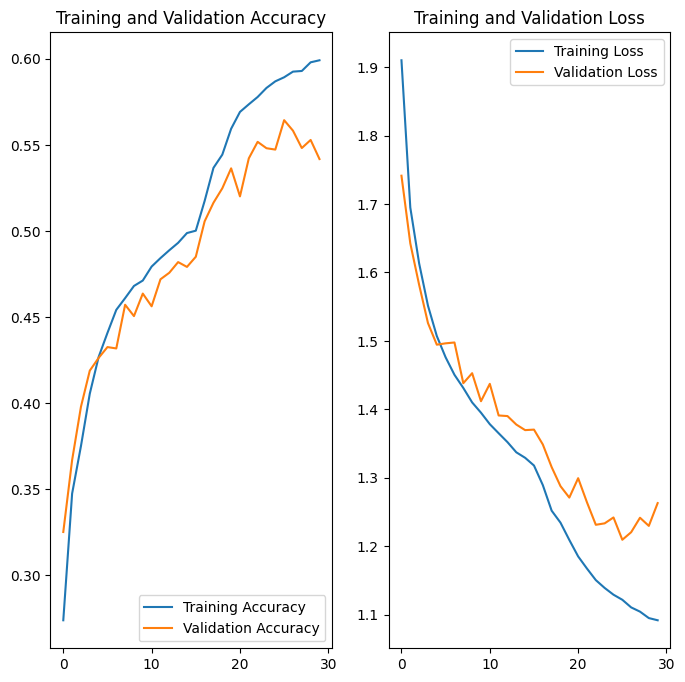

In [8]:
# Get accuracy and val_accuracy from history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Get loss and val_loss from history
loss = history.history['loss']
val_loss = history.history['val_loss']

# Set range to number of epochs
epochs_range = range(epochs)

# Plot data and label axes and title
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [9]:
# Print loss and accuracy
loss, accuracy = model.evaluate(X_test, y_test)
print('Test accuracy:', accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 914us/step - accuracy: 0.5402 - loss: 1.2490
Test accuracy: 0.5418000221252441


__Model Building__

For our improved model we implment strategies to mitigate the lose and improve the accuracy. As you can tell from the graphs above our model would have benifited from more epochs as it hasn't plateaud. So for this model we will run it for more epochs.

As well we have implemented more layers including 4 augmentation layers being two flips: Horizontal, and Vertical, A 10% rotation and a 10% zoom. These augmentation layers allow the model to have better general performance. 

We also increase the number of convolution layers from 1 to 3, with pooling layers between them, and finally a flattening layer which leads to our Dense layer followed by our output layer which remain unchanged.


In [10]:
# Initialize model
model_improved = keras.Sequential(
  [
    layers.Input((32,32,3)),
    layers.RandomFlip("horizontal"),
    layers.RandomFlip("vertical"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
  ]
)



In [11]:
# Compile the model
model_improved.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

__Optimizers__

Here we experimented with different optimization functions:

SGD Produced a final 10/10 Epoch result of:

    Epoch 10/10
    1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.5552 - loss: 1.2473 - val_accuracy: 0.5917 - val_loss: 1.1627


Where as Adam produced a final 10/10 Epoch result of:

    Epoch 10/10
    1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.6944 - loss: 0.8643 - val_accuracy: 0.7070 - val_loss: 0.8386

In [12]:
# Fit the model
epochs=30
history2 = model_improved.fit(
  X_train,
  y_train,
  validation_data= (X_test, y_test),
  epochs=epochs
)

Epoch 1/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.2746 - loss: 1.9455 - val_accuracy: 0.4756 - val_loss: 1.4356
Epoch 2/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.4549 - loss: 1.5149 - val_accuracy: 0.5053 - val_loss: 1.3489
Epoch 3/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.5009 - loss: 1.3923 - val_accuracy: 0.5366 - val_loss: 1.3063
Epoch 4/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.5221 - loss: 1.3323 - val_accuracy: 0.4789 - val_loss: 1.5430
Epoch 5/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.5383 - loss: 1.2908 - val_accuracy: 0.5528 - val_loss: 1.2812
Epoch 6/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.5512 - loss: 1.2562 - val_accuracy: 0.5798 - val_loss: 1.2021
Epoch 7/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.5635 - loss: 1.2256 - val_accuracy: 0.5862 - val_loss: 1.1685
Epoch 8/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.5783 - loss: 1

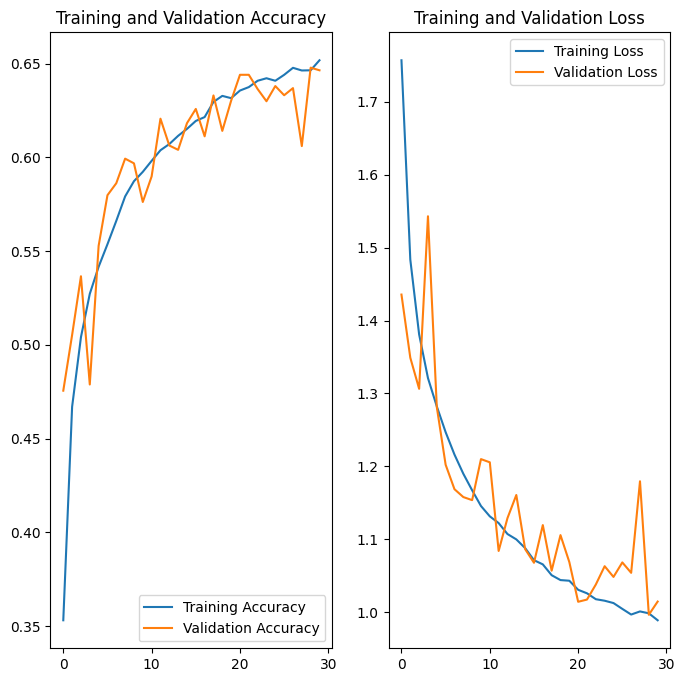

In [13]:
# Get accuracy and val_accuracy from history
acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']

# Get loss and val_loss from history
loss = history2.history['loss']
val_loss = history2.history['val_loss']

# Set range to number of epochs
epochs_range = range(epochs)

# Plot data and label axes and title
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [14]:
# Get accuracy and loss
loss, accuracy = model_improved.evaluate(X_test, y_test)
print('Test accuracy:', accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6473 - loss: 1.0035
Test accuracy: 0.646399974822998


__Analysis__

As you can see our accuracy is only 0.572 and our loss is around 1.2 if we compare this to our previous model with only 1 convolution layer we can see that is out preforms this current model.

        313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6048 - loss: 1.1413
        Test accuracy: 0.5996000170707703

So we need to refine our model even more, and perhaps we over-fit it with too many layers.

In [15]:
# Initialize Model
modelV3 = keras.Sequential(
  [
    layers.Input((32,32,3)),
    layers.Conv2D(16, kernel_size=3, activation='relu', padding='same'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, kernel_size=3, activation='relu', padding='same'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, kernel_size=3, activation='relu', padding='same'),
    layers.MaxPooling2D(),
    layers.Conv2D(128, kernel_size=3, activation='relu', padding='same'),
    layers.MaxPooling2D(),
    layers.Conv2D(256, kernel_size=3, activation='relu', padding='same'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
    
  ]
)


In [16]:
# Compile Model
modelV3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [17]:
# Fit Model
epochs=30
history3 = modelV3.fit(
  X_train,
  y_train,
  validation_data= (X_test, y_test),
  epochs=epochs
)

Epoch 1/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 11ms/step - accuracy: 0.3299 - loss: 1.7758 - val_accuracy: 0.5698 - val_loss: 1.1922
Epoch 2/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.5820 - loss: 1.1580 - val_accuracy: 0.6392 - val_loss: 1.0280
Epoch 3/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.6575 - loss: 0.9694 - val_accuracy: 0.6707 - val_loss: 0.9407
Epoch 4/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.7068 - loss: 0.8261 - val_accuracy: 0.6691 - val_loss: 0.9450
Epoch 5/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.7372 - loss: 0.7441 - val_accuracy: 0.7009 - val_loss: 0.8946
Epoch 6/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.7664 - loss: 0.6607 - val_accuracy: 0.6877 - val_loss: 0.9178
Epoch 7/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.7866 - loss: 0.6047 - val_accuracy: 0.6891 - val_loss: 0.9454
Epoch 8/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.8078 -

## Results and Analysis

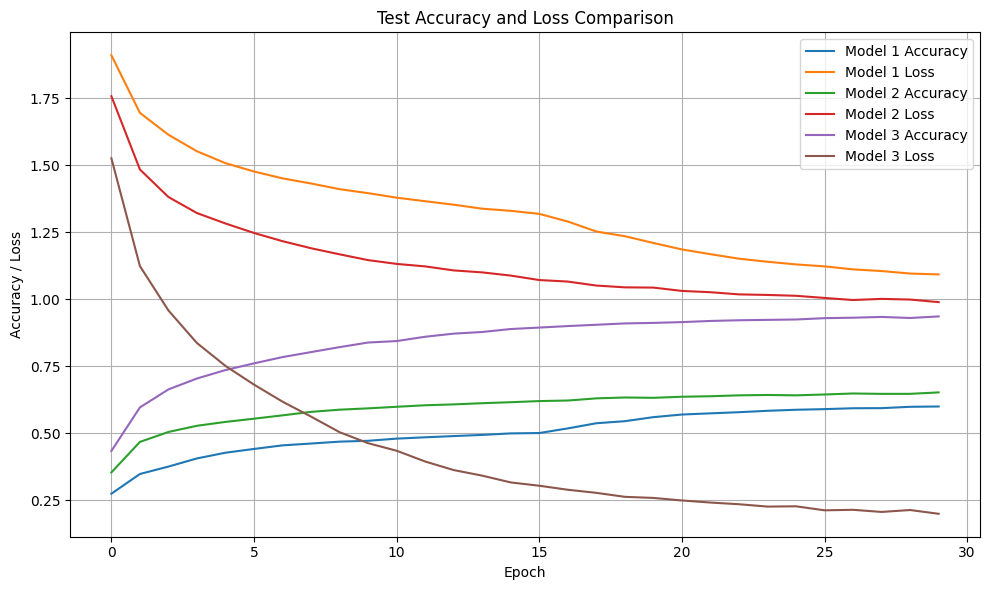

In [18]:

# Function to plot each model's history, takes in Model.history value and the desired label
def plot_history(history, label):
    plt.plot(history.history['accuracy'], label=label+' Accuracy')
    plt.plot(history.history['loss'], label=label+' Loss')
    plt.legend()

# Get model data from history 
model1_history = history
model2_history = history2
model3_history = history3

# Size figure
plt.figure(figsize=(10, 6))

# Plot the model data using plot_history
plot_history(model1_history, 'Model 1')
plot_history(model2_history, 'Model 2')
plot_history(model3_history, 'Model 3')

# Plot labels and title
plt.xlabel('Epoch')
plt.ylabel('Accuracy / Loss')
plt.title('Test Accuracy and Loss Comparison')

# Show grid and plot
plt.grid(True)
plt.tight_layout()
plt.show()

__Analysis__ 

From the graph we can see that our third model produces the best accuracy and minimizes the loss, by choosing the right layers and the correct amount of layers we can improve our model's performance. The third model surpassed the other two as it had proper depth, as well as utilizing greater convolution and this is evident when we evaluate our models on the test data. We can see that with our third model the accuracy increased however our loss is very high. This is likely due to our model being very good at classifying the training data but lacking in general performance with unseen data. To improve this we could introduce augmentation layers.

The metric chosen for evaluation were accuracy and loss as since we are dealing with image classification our primary concern is if we are classifying images correctly. The best way to measure this is to use the accuracy and loss measurements on our models. 

In [19]:
# Get accuracy and loss for each model and print

lossV1, accuracyV1 = model.evaluate(X_test, y_test)
lossV2, accuracyV2 = model_improved.evaluate(X_test, y_test)
lossV3, accuracyV3 = modelV3.evaluate(X_test, y_test)
print(f"The accuracy for the model 1 is {accuracyV1} and the loss for the model is {lossV1} \n")
print(f"The accuracy for the model 2 is {accuracyV2} and the loss for the model is {lossV2} \n")
print(f"The accuracy for the model 3 is {accuracyV3} and the loss for the model is {lossV3} \n")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 895us/step - accuracy: 0.5402 - loss: 1.2490
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6473 - loss: 1.0035
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7017 - loss: 1.8684
The accuracy for the model 1 is 0.5418000221252441 and the loss for the model is 1.26320219039917 

The accuracy for the model 2 is 0.646399974822998 and the loss for the model is 1.0143249034881592 

The accuracy for the model 3 is 0.6980999708175659 and the loss for the model is 1.9025378227233887 



## Discussion and Conclusion

This project has shown me that there are many variables at play when trying to build a Convolution Neural Network, and they types of layers and the width and depth of the layers plays a tremendous role on the models efficacy. The optimization of these layers is also another task, so trying to optimize CNN's is a very intensive process. This process would have been sped up a lot with GPU utilization however I could not install the proper Nvidia drivers to allow me to use my GPU which significantly slowed down model evaluation and testing. With GPU utilization I would have been able to tweak the layers and hyperparameters more as I would have spent less time waiting for the model to be fitted. 

Even still, I am happy with the results as the model is able to properly classify images a majority of the time and it's even able to classify this image I just got off of google 

(https://www.tastingtable.com/img/gallery/ive-tried-horse-meat-here-are-my-thoughts/l-intro-1682539768.jpg).

![Horsey](Horsey.png)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
7


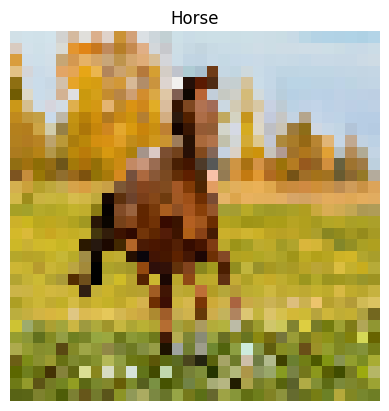

In [20]:

# Open custom Image for model testing
image = Image.open("Horsey.png")

# Format Image data for model
image = image.convert('RGB')
image_data = np.array(image)
image_data_batched= image_data.reshape((1,32, 32, 3))
image_data_batched = image_data_batched.astype('float32') / 255.0


# Get Prediction from Model and assign it's class value to the label
prediction = modelV3.predict(image_data_batched)
prediction = np.argmax(prediction)
print(prediction)

# Show image and give it a title
prediction = class_names[prediction]
plt.title(prediction)
plt.axis('off')
plt.imshow(image_data)


## Extra 

Added augmentation Layer and it increased the accuracy while decreasing the loss as expected, this Model is significantly more versatile that the last.

In [21]:
model_final = keras.Sequential(
  [
    layers.Input((32,32,3)),
    layers.RandomFlip("horizontal"),
    layers.RandomFlip("vertical"),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(128, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(256, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(1024, activation='relu'),
    layers.Dense(10, activation='softmax')
  ]
)

In [22]:
model_final.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [23]:
epochs=30
history_final = model_final.fit(
  X_train,
  y_train,
  validation_data= (X_test, y_test),
  epochs=epochs
)

Epoch 1/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 12ms/step - accuracy: 0.2769 - loss: 1.8802 - val_accuracy: 0.4637 - val_loss: 1.4581
Epoch 2/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.4994 - loss: 1.3696 - val_accuracy: 0.5388 - val_loss: 1.2736
Epoch 3/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.5667 - loss: 1.2034 - val_accuracy: 0.5796 - val_loss: 1.1586
Epoch 4/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.6091 - loss: 1.0883 - val_accuracy: 0.6165 - val_loss: 1.0558
Epoch 5/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.6326 - loss: 1.0250 - val_accuracy: 0.6547 - val_loss: 0.9762
Epoch 6/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.6543 - loss: 0.9688 - val_accuracy: 0.6462 - val_loss: 0.9872
Epoch 7/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.6740 - loss: 0.9114 - val_accuracy: 0.6740 - val_loss: 0.9256
Epoch 8/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.6872 -

In [24]:
loss_final, accuracy_final = model_final.evaluate(X_test, y_test)
print(f"The accuracy for the model 1 is {accuracy_final} and the loss for the model is {loss_final} \n")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7280 - loss: 0.8220
The accuracy for the model 1 is 0.7242000102996826 and the loss for the model is 0.8381294012069702 



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
7


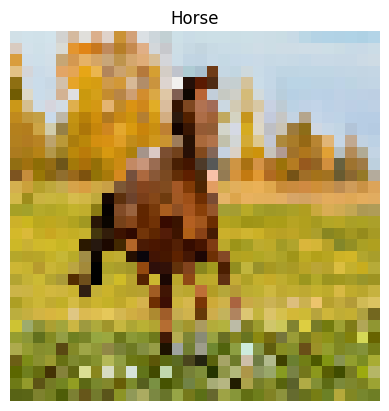

In [25]:
# Open custom Image for model testing
image = Image.open("Horsey.png")

# Format Image data for model
image = image.convert('RGB')
image_data = np.array(image)
image_data_batched= image_data.reshape((1,32, 32, 3))
image_data_batched = image_data_batched.astype('float32') / 255.0


# Get Prediction from Model and assign it's class value to the label
prediction = model_final.predict(image_data_batched)
prediction = np.argmax(prediction)
print(prediction)

# Show image and give it a title
prediction = class_names[prediction]
plt.title(prediction)
plt.axis('off')
plt.imshow(image_data)

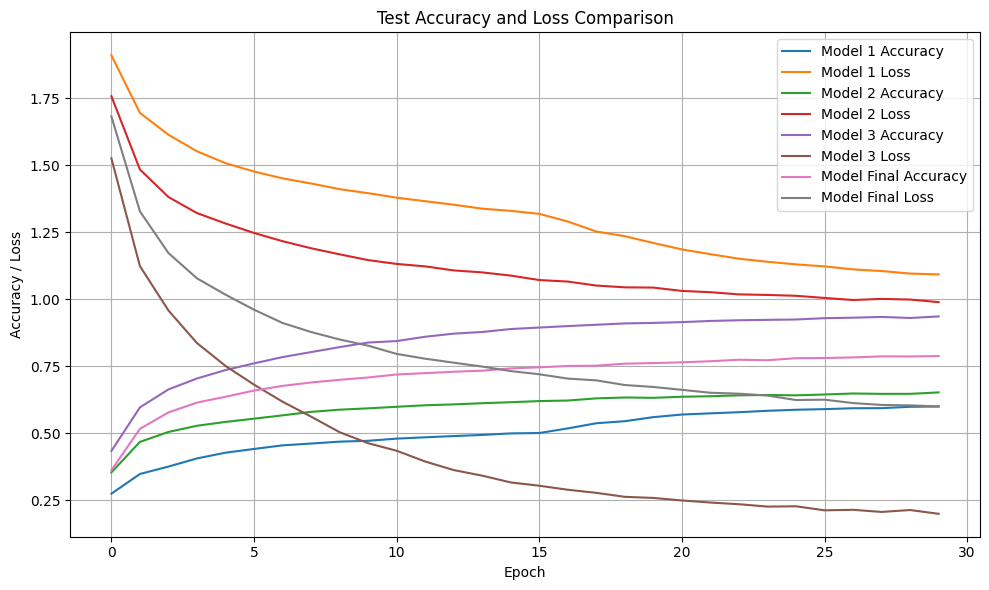

In [26]:
def plot_history(history, label):
    plt.plot(history.history['accuracy'], label=label+' Accuracy')
    plt.plot(history.history['loss'], label=label+' Loss')
    plt.legend()

# Get model data from history 
model1_history = history
model2_history = history2
model3_history = history3
model_final_history = history_final

# Size figure
plt.figure(figsize=(10, 6))

# Plot the model data using plot_history
plot_history(model1_history, 'Model 1')
plot_history(model2_history, 'Model 2')
plot_history(model3_history, 'Model 3')
plot_history(model_final_history, 'Model Final')

# Plot labels and title
plt.xlabel('Epoch')
plt.ylabel('Accuracy / Loss')
plt.title('Test Accuracy and Loss Comparison')

# Show grid and plot
plt.grid(True)
plt.tight_layout()
plt.show()